In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os
import json

## NCM network, Rossler homogeneous

In [2]:
if not os.path.exists("./images/"): 
    os.makedirs("./images/") 

image_fpath = "./images/"


# Rossler MSF class II, synchronisation error plots

In [3]:
if not os.path.exists("./images/msf2/"): 
    os.makedirs("./images/msf2/") 

image_fpath = "./images/msf2/"


In [4]:
df = pd.read_csv("./data/ncm_clusters_rossler.csv")
clusters = df.cluster.tolist()
clusters = [ast.literal_eval(s) for s in clusters]
clusters_dict= {}

for i in range(len(clusters)):
        #print(clusters[i])
        clusters_dict["C%d"%(i+1)] = clusters[i]


In [6]:
files = ["homogeneous_errdict2.npz","heteroParams_errdict2.npz", "heteroA_errdict2.npz"]

lambdas = np.arange(0, 0.5, 0.001)
length = len(lambdas)


In [9]:
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors

def plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    xlim1, xlim2 = [lambdas[0], 0.035], [0.035, 0.4]
    
    # Increase saturation of colors
    base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
    for c in color:
        c[1] = min(1, c[1] * 1.5)  # Increase saturation by 50%
    color = [mcolors.hsv_to_rgb(c) for c in color]

    for ax in (ax1, ax2):
        for i in range(len(clusters_dict)):
            cl_num = list(clusters_dict.keys())[i]
            err = clusters_errdict[cl_num]
            ax.plot(lambdas[:], np.mean(err[:,:], axis=0), 
                    label="%s = %s"%(cl_num, clusters_dict[cl_num]), 
                    color=color[i], linewidth=2.5)  # Increase line width
            dc = np.round(df["dc"][df["cluster"]==str(clusters_dict[cl_num])].item(), 5)
            ax.plot(dc, 0, alpha=0.7, marker='o', color=color[i], markersize=8)  # Increase marker size
        
        ax.plot(lambdas[:], np.mean(clusters_errdict["global_error"][:,:], axis=0),
                "--", color="k", label="Global error", linewidth=2.5)  # Increase line width
    
    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)
    
    ax1.set_ylabel("Synchronization error", size=15)
    ax1.set_xlabel("$d$", size=15)
    ax2.set_xlabel("$d$", size=15)
    
    ax1.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='both', labelsize=12)

    #plt.suptitle("Homogeneous, Rossler MSF II", size=15)

    fig.tight_layout()
    ax2.legend(loc='best', prop={'size': 9})

    # Uncomment the following line to save the figure
    # plt.savefig("clusters_syncError_expBrain1.pdf", facecolor="white", bbox_inches="tight", dpi=600)
    
    plt.show()

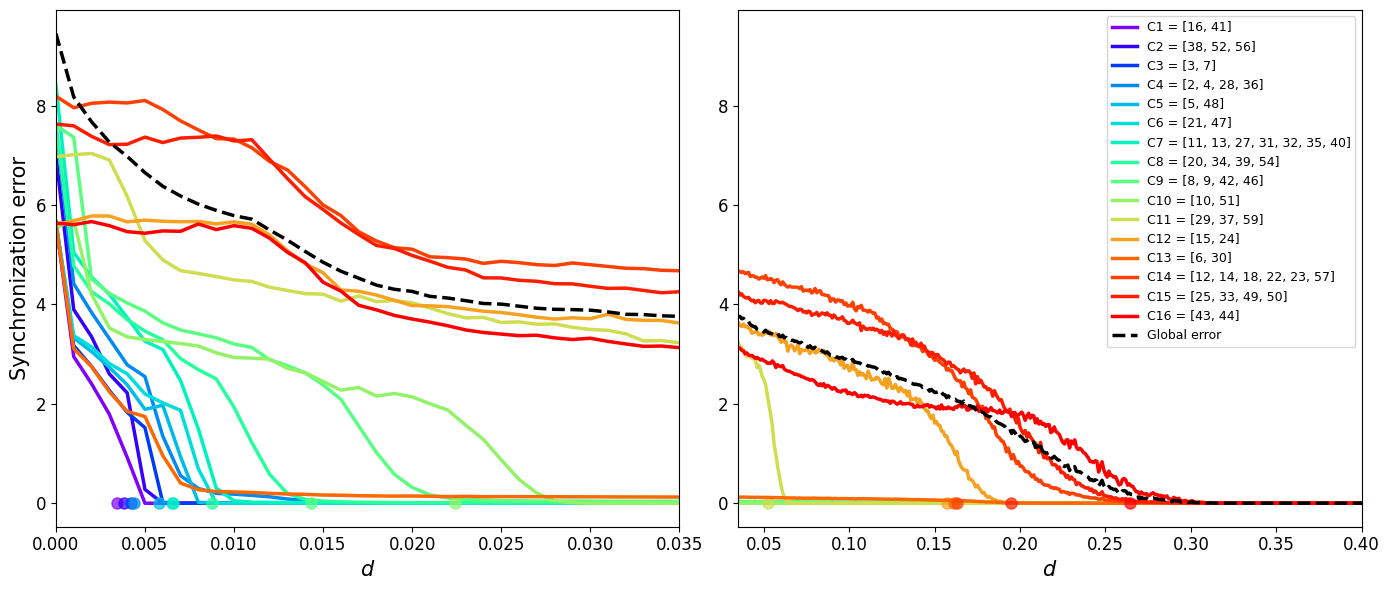

<Figure size 640x480 with 0 Axes>

In [11]:
clusters_errdict = np.load("./data/"+files[0])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)


plt.savefig(image_fpath+"homogeneous_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()

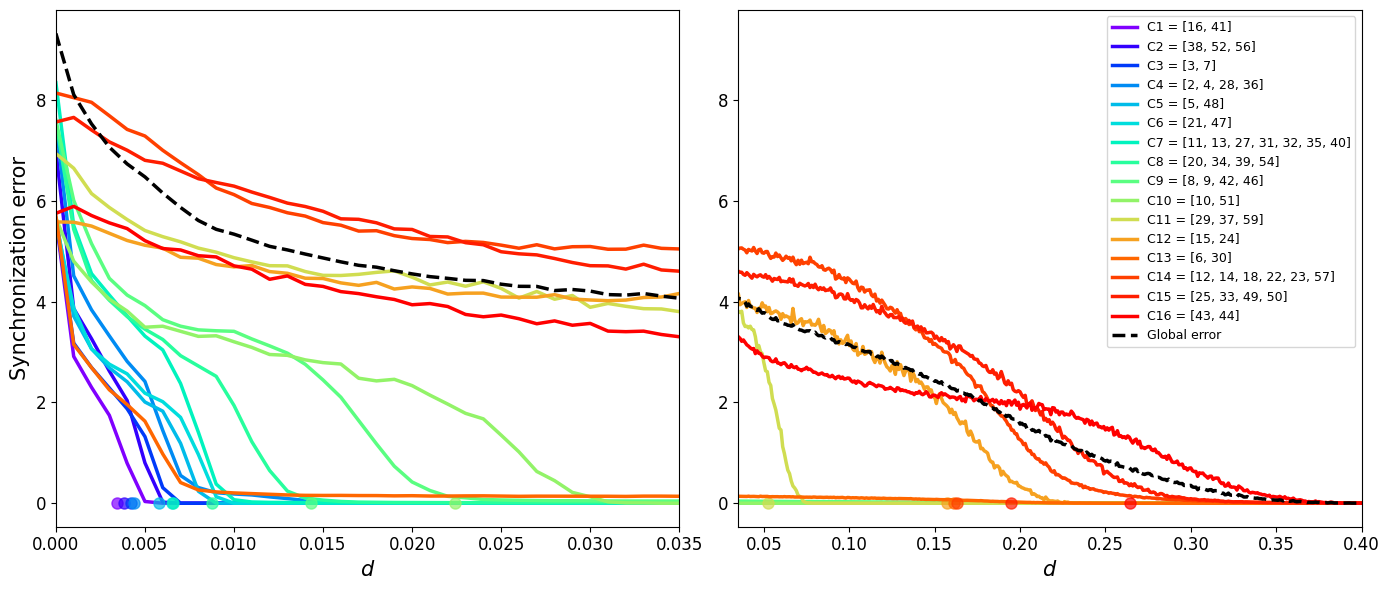

<Figure size 640x480 with 0 Axes>

In [12]:
clusters_errdict = np.load("./data/"+files[1])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Parameters (a,b,c), Rossler MSF II")

plt.savefig(image_fpath+"heteroParams_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()

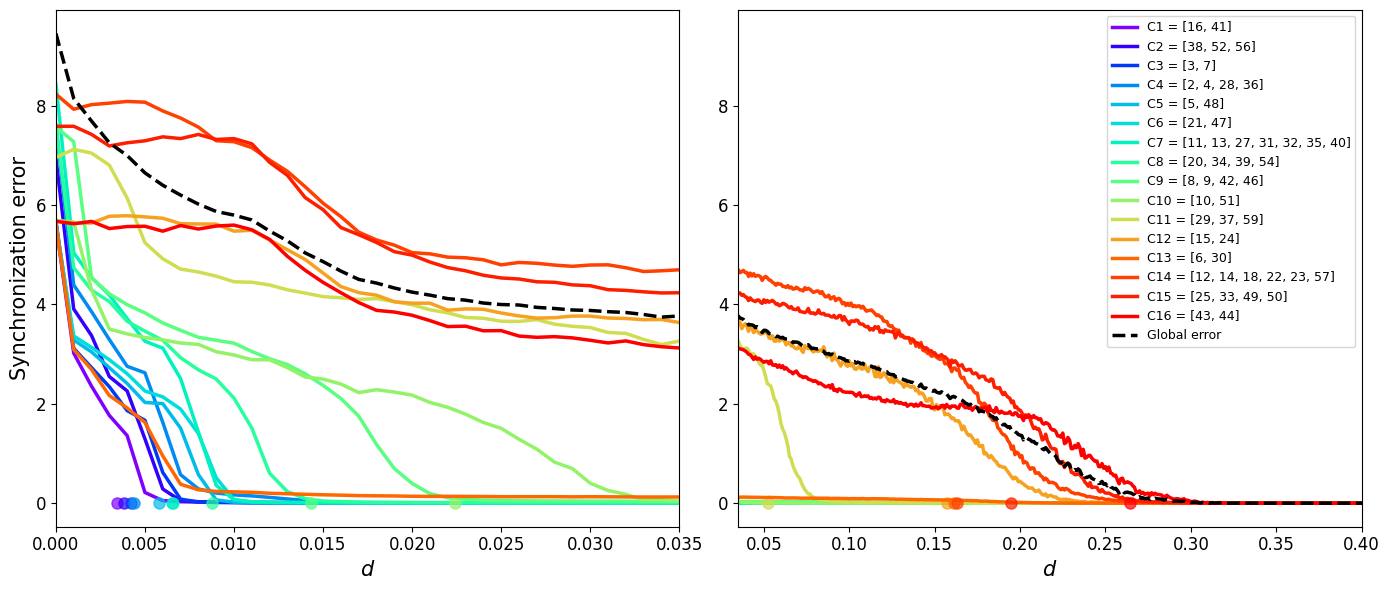

<Figure size 640x480 with 0 Axes>

In [13]:
clusters_errdict = np.load("./data/"+files[2])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Link weights, Rossler MSF II")

plt.savefig(image_fpath+"heteroA_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()

# Rossler MSF class III, synchronisation error plots

In [14]:
if not os.path.exists("./images/msf3/"): 
    os.makedirs("./images/msf3/") 

image_fpath = "./images/msf3/"


In [26]:
files = ["homogeneous_errdict3.npz","heteroParams_errdict3.npz", "heteroA_errdict3.npz"]
lambdas = np.arange(0, 1.5, 0.001)
length = len(lambdas)


In [24]:
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors

def plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    xlim1, xlim2 = [lambdas[0], 0.035], [0.035, 1.5]
    
    # Increase saturation of colors
    base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
    for c in color:
        c[1] = min(1, c[1] * 1.5)  # Increase saturation by 50%
    color = [mcolors.hsv_to_rgb(c) for c in color]

    for ax in (ax1, ax2):
        for i in range(len(clusters_dict)):
            cl_num = list(clusters_dict.keys())[i]
            err = clusters_errdict[cl_num]
            ax.plot(lambdas[:], np.mean(err[:,:], axis=0), 
                    label="%s = %s"%(cl_num, clusters_dict[cl_num]), 
                    color=color[i], linewidth=2.5)  # Increase line width
            dc = np.round(df["dc1"][df["cluster"]==str(clusters_dict[cl_num])].item(), 5)
            ax.plot(dc, 0, alpha=0.7, marker='o', color=color[i], markersize=8)  # Increase marker size
        
        ax.plot(lambdas[:], np.mean(clusters_errdict["global_error"][:,:], axis=0),
                "--", color="k", label="Global error", linewidth=2.5)  # Increase line width

    # Desynchronisation markers (only for ax2)
    for i in range(8):
        cl_num = list(clusters_dict.keys())[i]
        dc = np.round(df["dc2"][df["cluster"]==str(clusters_dict[cl_num])].item(), 5)
        ax2.plot(dc, 0, alpha=0.7, marker='s', color=color[i], markersize=8)  # Increase marker size

    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)
    
    ax1.set_ylabel("Synchronization error", size=15)
    ax1.set_xlabel("$d$", size=15)
    ax2.set_xlabel("$d$", size=15)
    
    ax1.tick_params(axis='both', labelsize=12)
    ax2.tick_params(axis='both', labelsize=12)

    #plt.suptitle("Homogeneous, Rossler MSF III", size=15)

    fig.tight_layout()
    ax2.legend(loc='best', prop={'size': 9})
    
    # Uncomment the following line to save the figure
    # plt.savefig("clusters_syncError_expBrain1.pdf", facecolor="white", bbox_inches="tight", dpi=600)
    
    plt.show()

In [16]:
image_fpath

'./images/msf3/'

In [23]:
files[0]

'homogeneous_errdict3.npz'

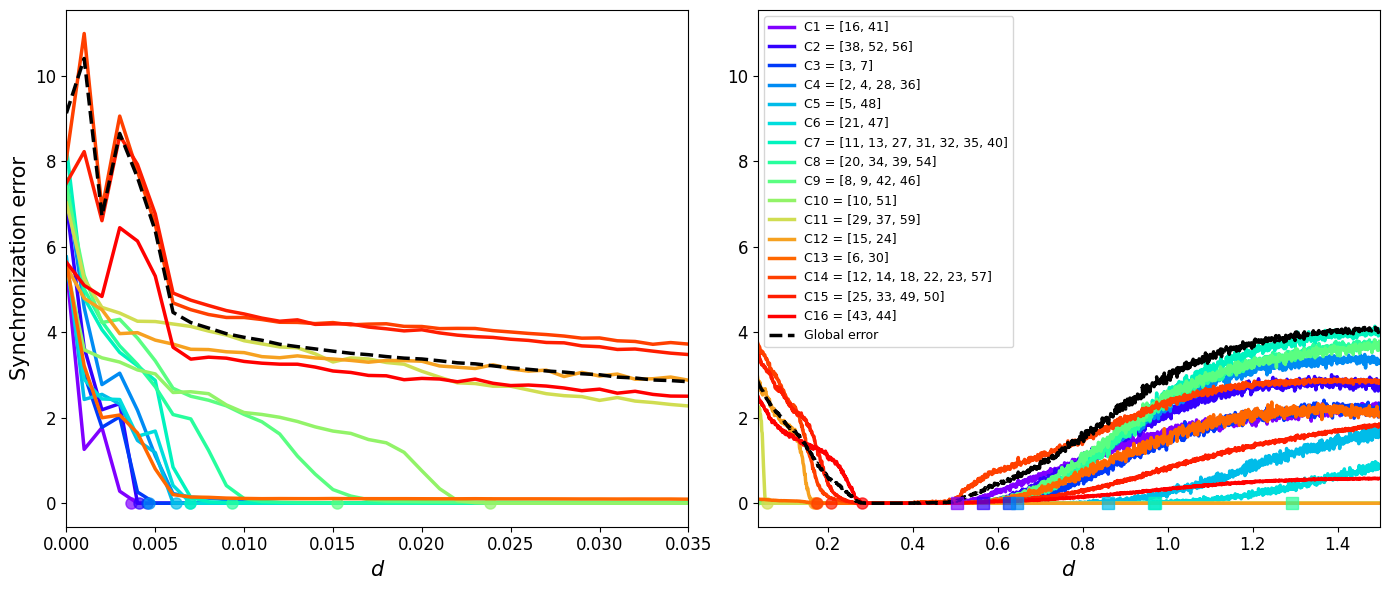

<Figure size 640x480 with 0 Axes>

In [27]:
clusters_errdict = np.load("./data/"+files[0])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Homogeneous, Rossler MSF III", size=15)
plt.savefig(image_fpath+"homogeneous_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()

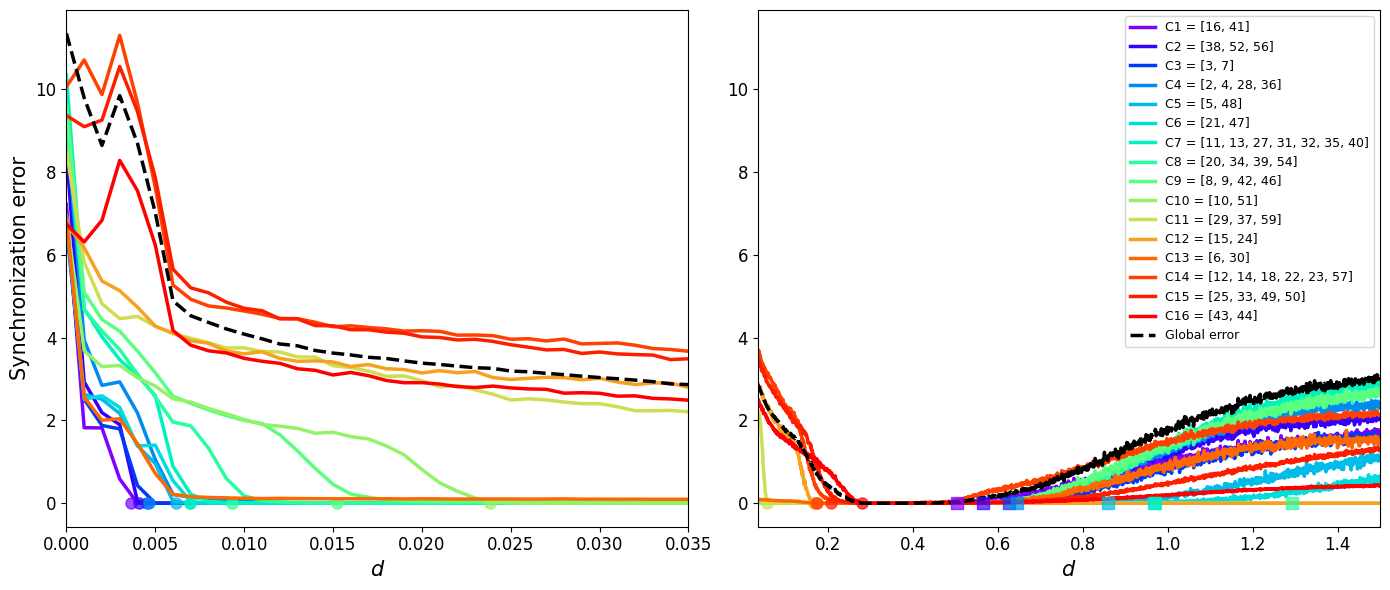

<Figure size 640x480 with 0 Axes>

In [28]:
clusters_errdict = np.load("./data/"+files[1])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Parameters (a,b,c), Rossler MSF III")

plt.savefig(image_fpath+"heteroParams_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()



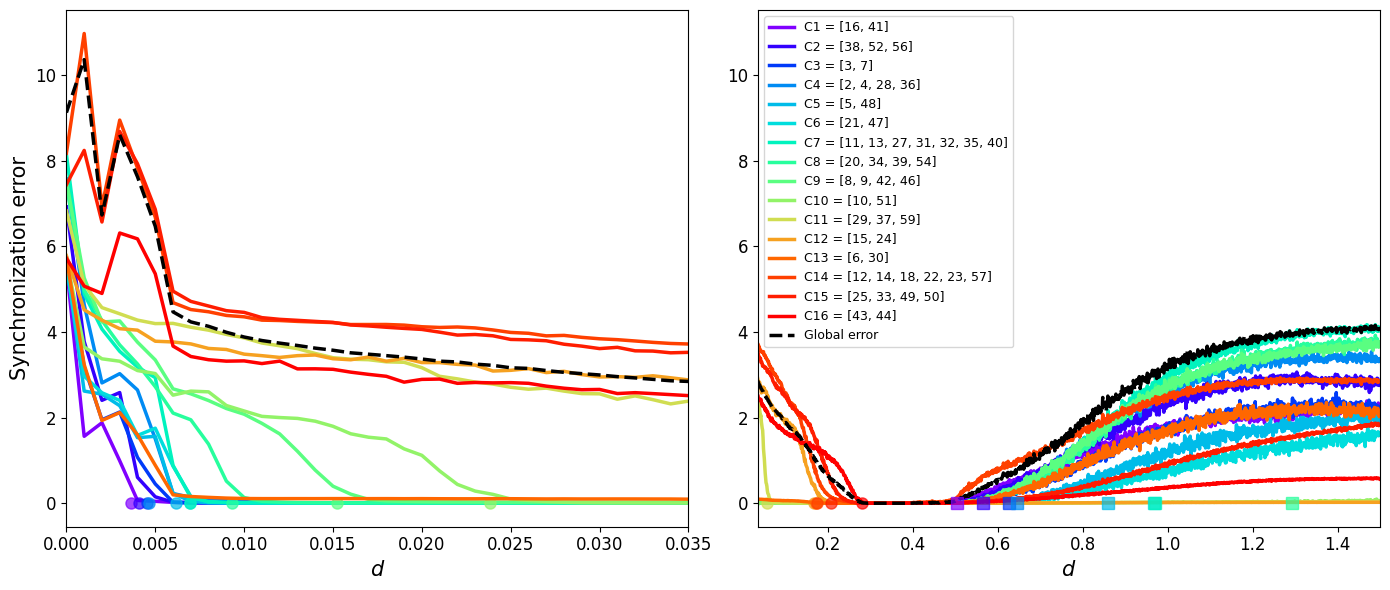

<Figure size 640x480 with 0 Axes>

In [29]:
clusters_errdict = np.load("./data/"+files[2])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Link weights, Rossler MSF III")

plt.savefig(image_fpath+"heteroA_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()